## Fruit Classification

#### A model that can identify the type of date from external features such as colour, length, diameter and shape factors which have been determined by a computer vision model.

In [190]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


import warnings

warnings.filterwarnings('ignore')

### Load the Data Set


In [191]:
dataset = pd.read_csv('Date_Fruit_Datasets.csv')
dataset.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [192]:
dataset.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


### Explanation          
Area from the descriptive statistics indicate the possibility of outliers having a minimum value of 1987 and the average of 298,295 and the quarters have values from 206,945 to 546063.  

The same applies to CONVEX_AREA. ASPECT_RATIO (min and max of 1.0 and 535.5 respectively)

This dataset describes various features related to shape and texture, such as area, perimeter, major and minor axes, eccentricity, and various statistical measures (e.g., skewness, kurtosis, entropy). Here's a summary of key observations:

1. Central Tendency: The mean area is approximately 298,295, while the mean perimeter is around 2,057, indicating large-sized objects or regions.
2. Spread: There is a high standard deviation in most features, especially in metrics like AREA, PERIMETER, and MAJOR_AXIS, suggesting a wide variation.
3. Outliers: The wide range between the minimum and maximum values in features like AREA and PERIMETER indicates potential outliers or varied shapes. For instance, the AREA ranges from 1,987 to 546,063.
4. Entropy Measures: The entropy values (EntropyRR, EntropyRG, EntropyRB) are negative with large magnitudes, which could indicate low randomness or structured patterns in the data.

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

Explanation

There records indicate that there are no null values and the datatypes for the records are ok. The Class indicates that its an object having string or complex data types.


In [194]:
duplicates = dataset[dataset.duplicated()]
duplicates

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class


### The Dataset has no duplicated values


In [195]:
counts = dataset['Class'].value_counts()

num_class = len(counts)
print('Number of Classes:',  num_class)
counts #.head()

Number of Classes: 7


Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

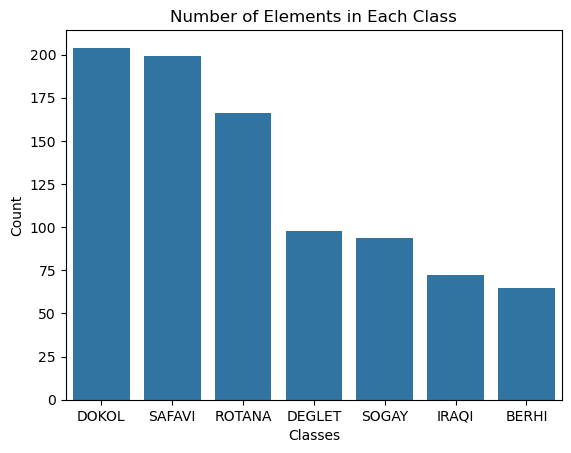

In [196]:
# Create a bar plot
sns.barplot(x=counts.index, y=counts.values)

# Add titles and labels
plt.title('Number of Elements in Each Class')
plt.xlabel('Classes')
plt.ylabel('Count')

# Show the plot
plt.show()

### Observation
The dataset contains five distinct classes of data with varying frequencies. Here's a brief description of each class and the overall distribution:

#### Class Distribution:

##### DOKOL: 204 instances
##### SAFAVI: 199 instances
##### ROTANA: 166 instances
##### DEGLET: 98 instances
##### SOGAY: 94 instances

#### Explanation:

The class distribution is somewhat imbalanced, with the class "DOKOL" having the highest number of instances (204) and "SOGAY" having the lowest (94).

"DOKOL" and "SAFAVI" are the most represented classes, together comprising a significant portion of the dataset.

"ROTANA" also has a relatively high count but is less frequent than the top two classes.

"DEGLET" and "SOGAY" have notably fewer instances, potentially leading to challenges in training models that perform well across all classes.

Implications:

This imbalance could affect the performance of machine learning models, potentially biasing them toward the more frequent classes ("DOKOL" and "SAFAVI").

Special techniques like resampling, using class weights, or data augmentation may be needed to address this imbalance for better generalization across all classes.

In [197]:
label = dataset['Class']
label.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [198]:
features = dataset.drop(columns='Class')
features.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [199]:
# Encode the label
label_encoder = LabelEncoder()

# Fit and Transform the labels into integers
encoded_label = label_encoder.fit_transform(label)

# Convert integer labels to one-hot encoding
#encoded_label = to_categorical(encoded_label)

# Reshape the labels into a 2D array
encoded_label = encoded_label.reshape(-1, 1)

encoded_label


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [200]:
# Create a DataFrame for the encoded labels 
encoded_labels_dataset = pd.DataFrame(encoded_label, columns=['Encoded Label'])
encoded_labels_dataset
#dataset['Encoded Label'] = encoded_labels_dataset
#dataset

,Encoded Label
0,0
1,0
2,0
3,0
4,0
...,...
893,6
894,6
895,6
896,6


In [201]:
# Get the mapping of labels to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label encoding mapping:", label_mapping)
data_label = pd.DataFrame(list(label_mapping.items()), columns=['Class','Encoded Label'])
data_label

Label encoding mapping: {'BERHI': 0, 'DEGLET': 1, 'DOKOL': 2, 'IRAQI': 3, 'ROTANA': 4, 'SAFAVI': 5, 'SOGAY': 6}


,Class,Encoded Label
0,BERHI,0
1,DEGLET,1
2,DOKOL,2
3,IRAQI,3
4,ROTANA,4
5,SAFAVI,5
6,SOGAY,6


In [202]:
# Scale the Features
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame if needed
scaled_features_dataset = pd.DataFrame(scaled_features, columns=features.columns)

scaled_features_dataset.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458251,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687311,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139260,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707124,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634558,0.615256,0.710963,0.581443,0.485820,0.395128


## Spliting the Dataset

In [203]:
# Split the data into training (70%), testing (15%), and validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_features, encoded_label, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")

Training set: (628, 34), (628, 1)
Testing set: (135, 34), (135, 1)
Validation set: (135, 34), (135, 1)


## Explanation

Label Encoding Mapping: This step maps each category to a corresponding integer.
##### Example mapping: {'Class_A': 0, 'Class_B': 1, 'Class_C': 2}
    
##### Feature Scaling: Features are scaled using MinMaxScaler to normalize the range of each feature between 0 and 1.
    
##### Data Splitting: The dataset is divided into three parts:

##### Training set: 70% of the data used for training the model.
##### Testing set: 15% of the data used for evaluating the model's performance.
##### Validation set: 15% of the data used for tuning the model.
                                    
This process ensures the data is well-prepared for training learning models, with proper label encoding, feature scaling, and balanced data splits.

## Modeling 

In [204]:
model = tf.keras.Sequential()

# Get the number of features from scaled_features
num_features = scaled_features.shape[1] 

# Add the input layer and the first hidden layer
# Replace num_features with the number of features in the dataset
model.add(layers.Dense(64, activation='relu', input_shape=(num_features,))) 

# Add a second hidden layer
model.add(layers.Dense(32, activation='relu'))

# Add the output layer and use 5 units with softmax activation
model.add(layers.Dense(7, activation='softmax')) 

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 64)                2240      
                                                                 
 dense_106 (Dense)           (None, 32)                2080      
                                                                 
 dense_107 (Dense)           (None, 10)                330       
                                                                 
Total params: 4650 (18.16 KB)
Trainable params: 4650 (18.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [205]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 64)                2240      
                                                                 
 dense_106 (Dense)           (None, 32)                2080      
                                                                 
 dense_107 (Dense)           (None, 10)                330       
                                                                 
Total params: 4650 (18.16 KB)
Trainable params: 4650 (18.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train and Predict on the Validation Set

In [221]:
#y_train_encoded = to_categorical(y_train, num_classes=num_classes)
print(X_train.shape)
print(y_train.shape)
training = model.fit(X_train, y_train, epochs=10, verbose=0)
loss ,accuracy =model.evaluate(X_train, y_train, verbose=1)

print("Model Accuacy on Train set: ", accuracy) 
print("Model Loss on Train set: ", loss) 

(628, 34)
(628, 1)
20/20 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8599
Model Accuacy on Train set:  0.8598726391792297
Model Loss on Train set:  0.43236809968948364


In [207]:

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)

# Predictions and confusion matrix
y_val_pred = np.argmax(model.predict(X_val), axis=-1)
y_val_true = np.argmax(y_val, axis=-1)
conf_matrix = confusion_matrix(y_val_true, y_val_pred)


5/5 [==============================] - 0s 4ms/step


In [208]:
# Print the confusion Matrix
conf_matrix

array([[ 2, 14, 35,  9, 36, 27, 12],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]], dtype=int64)

## Create and Train 5 other Model, Record the Accuracy and Select Best Model

In [237]:
# Define a function to build, compile, train, and evaluate a model
def create_and_evaluate_model(num_of_layers, activation, optimizer, loss, epochs=10, batch_size=16):
    new_model = tf.keras.Sequential()

    # Get the number of features from scaled_features
    num_features = scaled_features.shape[1] 
     # Ensure labels are one-hot encoded
    #y_train_encoded = to_categorical(y_train, num_classes=num_classes)
    #y_val_encoded = to_categorical(y_val, num_classes=num_classes)
    #print(y_train_encoded.shape)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # Add the input layer and the first hidden layer
    # Replace num_features with the number of features in the dataset
    new_model.add(layers.Dense(64, activation='relu', input_shape=(num_features,))) 
    
    for units in num_of_layers:
        # Add another hidden layer
        new_model.add(layers.Dense(units, activation=activation))

    
    # Add the output layer with softmax activation for a multiclass data
    new_model.add(layers.Dense(7, activation='softmax')) 
    
    new_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    new_model.summary()
    # Train the model
    training = new_model.fit(X_train, y_train, epochs=epochs, verbose=1)
    
    # Evaluate the model on validation set
    val_loss, val_accuracy = new_model.evaluate(X_val, y_val, verbose=1)
    
    # Predictions and confusion matrix
    y_val_pred = np.argmax(new_model.predict(X_val), axis=-1)
    y_val_true = np.argmax(y_val, axis=-1)
    conf_matrix = confusion_matrix(y_val_true, y_val_pred)
    
    return {
        "model": new_model,
        "val_accuracy": val_accuracy,
        "conf_matrix": conf_matrix, 
        "loss": val_loss
    }


In [238]:
# Define five different sets of hyperparameters for the models
hyperparams_list = [
    {"num_of_layers": [64, 32], "activation": "relu", "optimizer": "adam", "loss": "sparse_categorical_crossentropy", "epochs":50},
    {"num_of_layers": [128, 64, 32], "activation": "tanh", "optimizer": "sgd", "loss": "sparse_categorical_crossentropy", "epochs":70},
    {"num_of_layers": [256, 128, 64], "activation": "relu", "optimizer": "adam", "loss": "sparse_categorical_crossentropy", "epochs":80},
    {"num_of_layers": [128, 64], "activation": "relu", "optimizer": "rmsprop", "loss": "sparse_categorical_crossentropy", "epochs":90},
    {"num_of_layers": [512, 256, 128], "activation": "relu", "optimizer": tf.keras.optimizers.Adam(learning_rate=0.0001), "loss": "sparse_categorical_crossentropy", "epochs":110}
]



In [239]:
# Train and evaluate each model
results = []
for i, params in enumerate(hyperparams_list):
    result = create_and_evaluate_model(**params)
    results.append(result)
    print(f"Model {i+1}: Validation Accuracy = {result['val_accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['conf_matrix']}\n")


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 64)                2240      
                                                                 
 dense_171 (Dense)           (None, 64)                4160      
                                                                 
 dense_172 (Dense)           (None, 32)                2080      
                                                                 
 dense_173 (Dense)           (None, 10)                330       
                                                                 
Total params: 8810 (34.41 KB)
Trainable params: 8810 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 2s 4ms/step - loss: 2.1912 - accuracy: 0.1656
Epoch 2/50
20/20 [==============================] - 0

In [243]:
n=0
for result in results:
    n=n+1
    print("HyperParamters for Model ", n , ": ", hyperparams_list[n-1])
    print("Accuracy for Model ", n, ":", result['val_accuracy'])
    print("Loss for Model ", n, ":", result['loss'])
    print("Confusion Matrix for Model ", n, ":", result['conf_matrix'])
    print("*****************************************************************")

HyperParamters for Model  1 :  {'num_of_layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'epochs': 50}
Accuracy for Model  1 : 0.9111111164093018
Loss for Model  1 : 0.3014119565486908
Confusion Matrix for Model  1 : [[ 8 20 29 12 28 21 17]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
*****************************************************************
HyperParamters for Model  2 :  {'num_of_layers': [128, 64, 32], 'activation': 'tanh', 'optimizer': 'sgd', 'loss': 'sparse_categorical_crossentropy', 'epochs': 70}
Accuracy for Model  2 : 0.8740741014480591
Loss for Model  2 : 0.49106737971305847
Confusion Matrix for Model  2 : [[ 7 23 29 13 30 21 12]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
*********************************************

In [244]:

# Identify the best model
best_model_index = np.argmax([res['val_accuracy'] for res in results])
best_model = results[best_model_index]['model']
print("Accracy of the Best Model: ",results[best_model_index]['val_accuracy'])

Accracy of the Best Model:  0.9407407641410828


### Explanation
Model 4 demonstrates the highest validation accuracy of  0.9407, which suggests it generalizes better on unseen data compared to the other models.

Confusion Matrix Analysis: Model 4 has fewer misclassifications (off-diagonal values) across different classes, indicating balanced performance across both frequent and rare classes.

## Evaluate On Test Data

In [245]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
y_test_pred = np.argmax(best_model.predict(X_test), axis=-1)
y_test_true = np.argmax(y_test, axis=-1)
test_conf_matrix = confusion_matrix(y_test_true, y_test_pred)

print(f"Best Model Test Accuracy: {test_accuracy:.4f}")
print(f"Test Set Confusion Matrix:\n{test_conf_matrix}")


5/5 [==============================] - 0s 1ms/step
Best Model Test Accuracy: 0.9185
Test Set Confusion Matrix:
[[ 8  9 37 11 24 31 15]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


### Explanation

While the model has an overall high accuracy of 91.85%, it has poor performance in distinguishing between multiple classes, as evidenced by the confusion matrix. For this use case, where accurate classification across multiple categories is likely critical, the model needs further refinement to improve class-specific performance.

The loss value of 0.2205 is relatively low, suggesting that the model has a good fit to the training data. However, this doesn't align with the confusion matrix, where misclassification of non-dominant classes is evident.

Addressing class imbalance or re-tuning the model to reduce its bias towards the dominant class will be essential for enhancing its ability to make more accurate predictions across all classes.

Improving this could involve techniques like resampling the training data, penalizing misclassification of minority classes, or adjusting the class weights to encourage the model to pay more attention to underrepresented classes.